In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
rain = pd.read_csv("Rainfall_data.csv")
print(rain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               252 non-null    int64  
 1   Month              252 non-null    int64  
 2   Day                252 non-null    int64  
 3   Specific Humidity  252 non-null    float64
 4   Relative Humidity  252 non-null    float64
 5   Temperature        252 non-null    float64
 6   Precipitation      252 non-null    float64
 7   Chance             252 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 15.9+ KB
None


In [ ]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 1
Categorical Features:  ['Chance']


In [ ]:
rain["Chance"] = np.where(rain["Chance"] == "Low", 0, 1)
rain

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation,Chance
0,2000,1,1,8.06,48.25,23.93,0.00,0
1,2000,2,1,8.73,50.81,25.83,0.11,0
2,2000,3,1,8.48,42.88,26.68,0.01,0
3,2000,4,1,1.79,55.69,22.49,0.02,0
4,2000,5,1,17.40,70.88,19.07,271.14,1
...,...,...,...,...,...,...,...,...
247,2020,8,1,20.08,92.31,5.34,1203.09,1
248,2020,9,1,19.71,90.12,9.22,361.30,1
249,2020,10,1,18.43,82.69,12.62,180.18,0
250,2020,11,1,14.83,76.06,16.95,0.49,0


In [ ]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 8
Numerical Features:  ['Year', 'Month', 'Day', 'Specific Humidity', 'Relative Humidity', 'Temperature', 'Precipitation', 'Chance']


In [ ]:
#Cardinality Check
for each_feature in categorical_features:
   unique_values = len(rain[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Chance are: 2


In [ ]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
rain[categorical_features].isnull().sum()

Series([], dtype: float64)

In [ ]:
categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
rain[numerical_features].isnull().sum()

Year                 0
Month                0
Day                  0
Specific Humidity    0
Relative Humidity    0
Temperature          0
Precipitation        0
Chance               0
dtype: int64

In [ ]:
# Remove Outliers
features_with_outliers = ['Year',	'Month',	'Day',	'Specific Humidity', 'Relative Humidity',	'Temperature',	'Precipitation', 'Chance']
for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

In [ ]:
numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

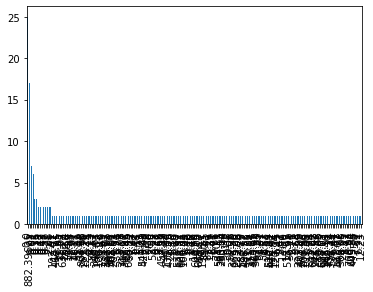

In [ ]:
rain['Precipitation'].value_counts().plot(kind='bar')

In [ ]:
X = rain.drop(['Precipitation','Chance'],axis=1)
y = rain['Precipitation']

from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.02766651, 0.18120618, 0.        , 0.24908134, 0.1655331 ,
       0.37651287])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 201
Length of Testing Data: 51


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([ 1.76223284e+01, -8.19074826e+01, -1.04946436e+02,  5.18277735e+02,
        5.56930757e+02,  5.68899928e+02,  1.06166191e+02, -1.51249477e+02,
       -1.88477507e+01,  9.23504751e+01,  3.43481136e+02,  1.70860207e+02,
       -9.80686462e+01,  2.94542465e+02,  2.10230692e+02, -5.87943868e+01,
       -7.02365255e+01,  1.83155896e+01,  1.17400106e+01, -2.23625632e+02,
        5.18269849e+02,  1.62223906e+02,  8.35240112e+01,  5.41557679e+02,
       -1.55037683e+01,  4.33113582e+01,  3.68840862e+02,  5.55390693e+02,
        2.61168154e+02,  3.50446012e+01,  5.63568676e+02,  5.80004492e+02,
        4.50618613e-01, -1.86169357e+02,  5.58629633e+01, -2.19053808e+02,
        5.56460967e+02,  5.18047255e+02,  2.25112525e+01,  1.45937420e+02,
        4.62396805e+02, -3.32351465e+01, -7.17000293e+00,  1.08449391e+02,
        5.71052701e+02,  2.54349336e+02,  2.29120422e+02,  4.70417227e+02,
        5.41519983e+02,  1.52348997e+01, -5.94526293e+01])

In [ ]:
import pickle
pickle.dump(lr, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
#Y,M,D,H,T
pop = model.predict([[2020,1,1,17,48.25,23.93]])
#pop = model.predict([[2020,1,1,17,37,32.6]])
pop

array([13092.64817753])

In [ ]:
X = rain.drop(['Chance'],axis=1)
y = rain['Chance']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
y_pred

array([0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])

In [ ]:
pickle.dump(logr, open('model1.pkl','wb'))
model1 = pickle.load(open('model1.pkl','rb'))
#Y,M,D,H,T
#pop = model1.predict([[2020,6,1,17,90,17,800]])
pop = model1.predict([[2020,11,11,40,33.10,32.6,50]])
if(pop == 0):
  print("Low")
if(pop == 1):
  print("High")

Low
